In [1]:
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [2]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\weather project csv file\uptodatecalgary.csv', index_col="DATE")

In [3]:
Calgary_df

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,9.0,-5.0,NaN,NaN
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,24.0,NaN,NaN,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,16.0,2.0,NaN,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,27.0,NaN,NaN,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,NaN,37.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,53.0,58.0,49.0,NaN,NaN
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,63.0,77.0,50.0,14.0,69.3
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,70.0,90.0,51.0,33.0,107.4


In [4]:
Calgary_df.loc["2018-01-01",:]

STATION                        CA003031094
NAME       CALGARY INTERNATIONAL CS, AB CA
PRCP                                   0.0
SNWD                                   4.3
TAVG                                   0.0
TMAX                                  26.0
TMIN                                 -26.0
WDFG                                   0.0
WSFG                                   0.0
Name: 2018-01-01, dtype: object

In [6]:
#select column
Calgary1_df =Calgary_df.iloc[:, [0,1,2,3,5,6]].copy()

In [7]:
Calgary1_df 

,STATION,NAME,PRCP,SNWD,TMAX,TMIN
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


Data cleaning  EDA and preprocessing.

Find the missing values in a column

In [8]:
#find the no of null value in this  columns
Calgary_df.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP         56
SNWD       3140
TAVG       2258
TMAX         29
TMIN         32
WDFG       3048
WSFG       3048
dtype: int64

In [9]:
# to calculate the percentage of null divided by the no of rows
null_pct = Calgary_df.apply(pd.isnull).sum() / Calgary_df.shape[0]
null_pct


STATION    0.000000
NAME       0.000000
PRCP       0.010646
SNWD       0.596958
TAVG       0.429278
TMAX       0.005513
TMIN       0.006084
WDFG       0.579468
WSFG       0.579468
dtype: float64

In [10]:
# selected columns with change of name.
Calgary1_df.columns = ["STATION","Name","precip","snow_depth","temp_max", "temp_min"]

In [11]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


In [12]:
Calgary1_df["snow_depth"]. value_counts()

snow_depth
0.0     333
0.4     303
2.8     185
1.2     164
0.8     147
2.0     139
2.4     131
1.6     130
3.1     124
3.5      86
3.9      84
4.3      64
4.7      50
5.1      37
6.3      35
5.5      35
5.9      20
7.5      14
6.7      13
7.1       8
7.9       5
9.4       3
8.7       3
9.1       2
8.3       1
9.8       1
11.4      1
10.2      1
10.6      1
Name: count, dtype: int64

verify correct data types

In [13]:
Calgary1_df.dtypes

STATION        object
Name           object
precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [14]:
Calgary1_df.index

Index(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26', '2008-12-27',
       '2008-12-28', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-01',
       ...
       '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
       '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31', '2023-08-01'],
      dtype='object', name='DATE', length=5260)

In [15]:
# convert out DATE into a datetime
Calgary1_df.index= pd.to_datetime(Calgary1_df.index)

In [16]:
Calgary1_df.index

DatetimeIndex(['2008-12-23', '2008-12-24', '2008-12-25', '2008-12-26',
               '2008-12-27', '2008-12-28', '2008-12-29', '2008-12-30',
               '2008-12-31', '2009-01-01',
               ...
               '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
               '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='DATE', length=5260, freq=None)

In [17]:
# we can check  day month ,year
Calgary1_df.index.year

Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2009,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=5260)

In [18]:
Calgary1_df.index.day_of_year

Index([358, 359, 360, 361, 362, 363, 364, 365, 366,   1,
       ...
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213],
      dtype='int32', name='DATE', length=5260)

In [19]:
Calgary1_df.index.month

Index([12, 12, 12, 12, 12, 12, 12, 12, 12,  1,
       ...
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8],
      dtype='int32', name='DATE', length=5260)

In [20]:
#checking for gaps
Calgary1_df.index.year.value_counts().sort_index()

DATE
2008      9
2009    363
2010    362
2011    362
2012    364
2013    329
2014    362
2015    363
2016    358
2017    360
2018    360
2019    363
2020    364
2021    363
2022    365
2023    213
Name: count, dtype: int64

Data visualization

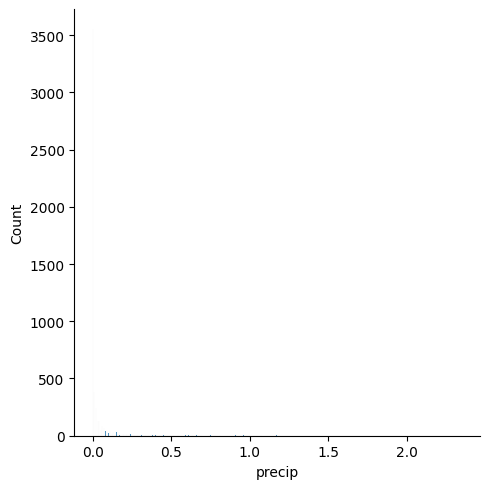

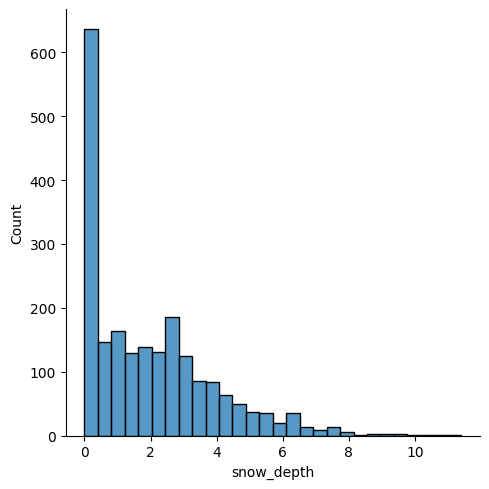

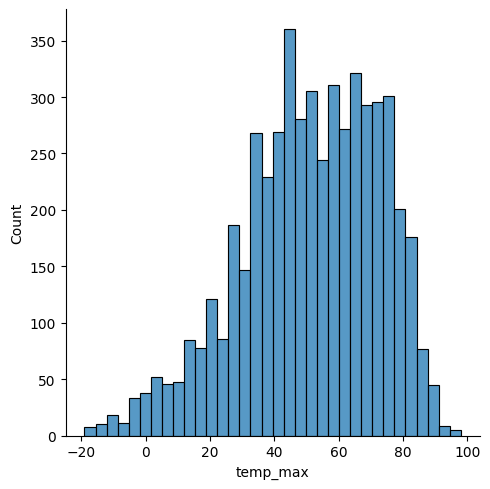

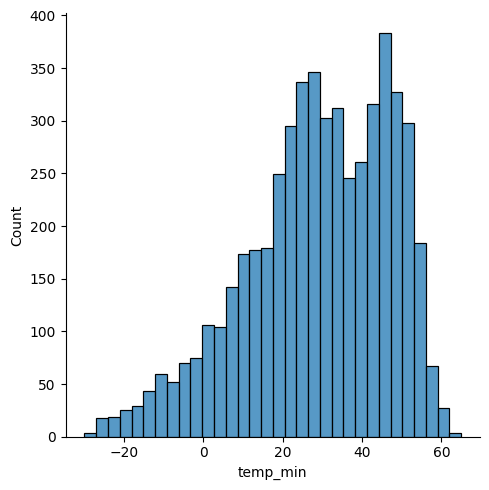

In [20]:
for column in ["precip","snow_depth", "temp_max", "temp_min"]:
    sns.displot(Calgary1_df[column])


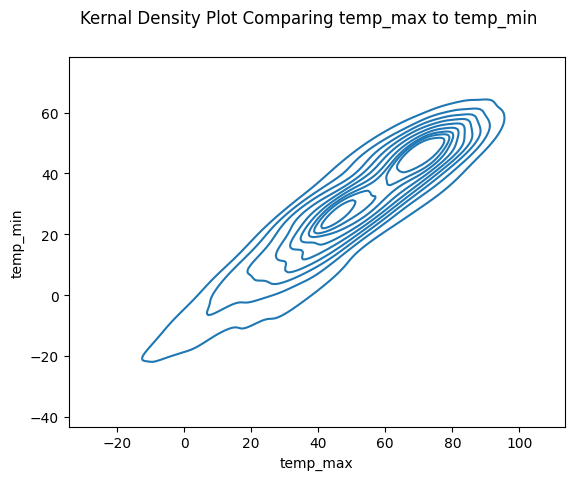

In [21]:
#show relationship between insulin and glucose
import matplotlib.pyplot as plt
sns.kdeplot(data=Calgary1_df, 
            x='temp_max', 
            y='temp_min')
plt.suptitle("Kernal Density Plot Comparing temp_max to temp_min")
plt.show()


Thereis correlation between temp_min and temp_max.

<Axes: xlabel='DATE'>

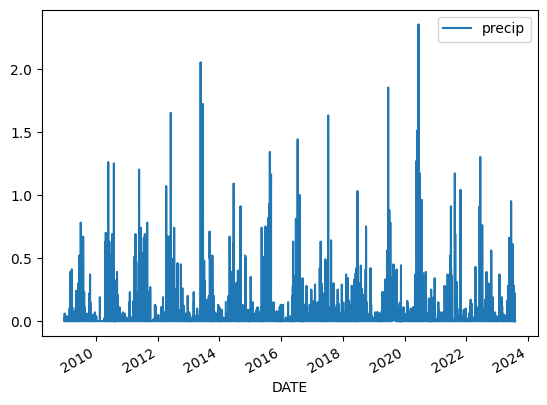

In [22]:
Calgary1_df[["precip"]].plot()

<Axes: xlabel='DATE'>

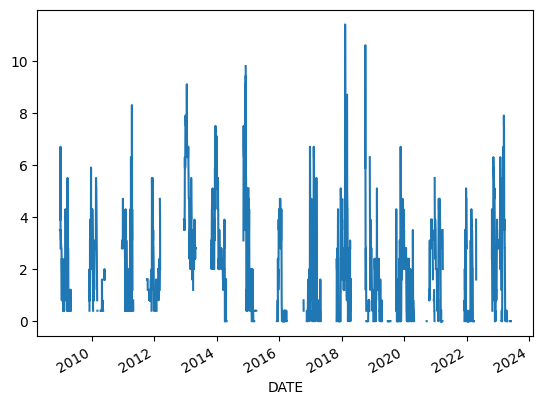

In [23]:
Calgary1_df["snow_depth"].plot()

<Axes: xlabel='DATE'>

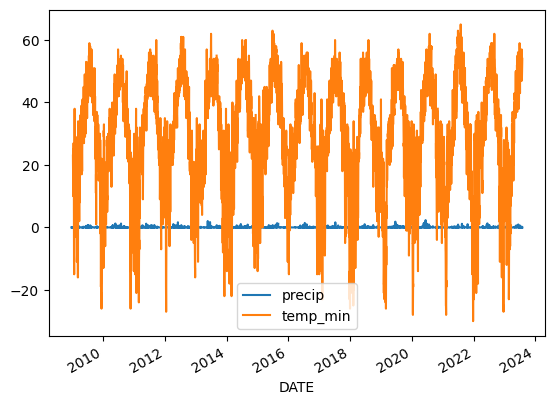

In [24]:
Calgary1_df[["precip","temp_min"]].plot()

Replace null value .

In [21]:
# check where row is null for temp_min
Calgary1_df[pd.isnull(Calgary1_df["temp_min"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2008-12-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.06,3.9,20.0,NaN
2008-12-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.01,4.3,17.0,NaN
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN


In [22]:
# select where row is null for max
Calgary1_df[pd.isnull(Calgary1_df["temp_max"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.03,6.7,NaN,NaN
2008-12-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,NaN,NaN
2009-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.1,NaN,NaN
2009-01-06,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN
2009-01-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,2.8,NaN,NaN


In [23]:
# select where row is null for snow_depth
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,37.0,NaN
2009-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.05,NaN,NaN,NaN
2009-01-31,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,44.0,15.0
2009-04-07,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,54.0,28.0
2009-04-17,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,60.0,26.0
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,NaN,90.0,51.0


replace null values in snowdepth with 0

In [24]:
Calgary1_df['snow_depth'].fillna(0, inplace=True)

In [25]:
Calgary1_df

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,NaN
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,NaN
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,NaN
...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",NaN,0.0,90.0,51.0


In [26]:
#fill all  values with the previous ones in temp_max and temp_min and others. this is called forward fill
Calgary1c_df = Calgary1_df.fillna(method="ffill")

In [27]:
Calgary1c_df.head()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,9.0,-5.0
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,24.0,-5.0
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,16.0,2.0
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,3.5,27.0,2.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.0,0.0,37.0,2.0


In [28]:
Calgary1c_df.loc["2009-01-31",:]

STATION                           CA003031094
Name          CALGARY INTERNATIONAL CS, AB CA
precip                                    0.0
snow_depth                                0.0
temp_max                                 44.0
temp_min                                 15.0
Name: 2009-01-31 00:00:00, dtype: object

<Axes: xlabel='DATE'>

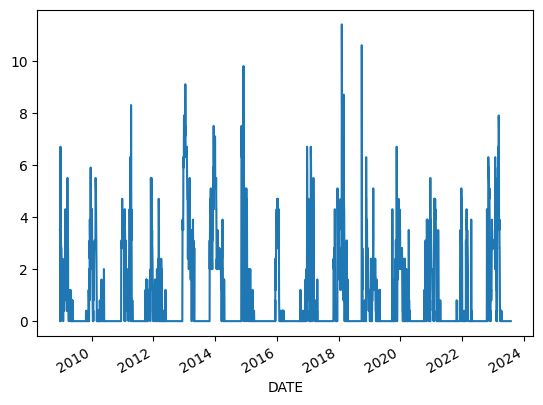

In [33]:
# snow depth after filling nan with zero
Calgary1_df["snow_depth"].plot()

EDA continuation. Analysing weather data

<Axes: xlabel='DATE'>

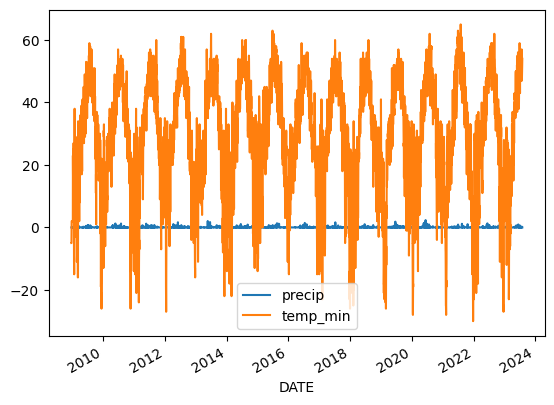

In [34]:
Calgary1c_df[["precip","temp_min"]].plot()

<Axes: xlabel='DATE'>

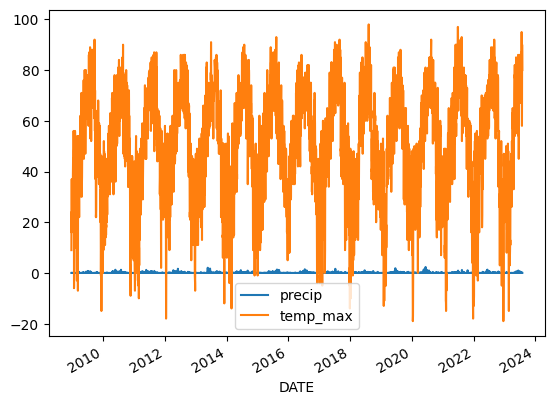

In [35]:
Calgary1c_df[["precip","temp_max"]].plot()

<Axes: xlabel='DATE'>

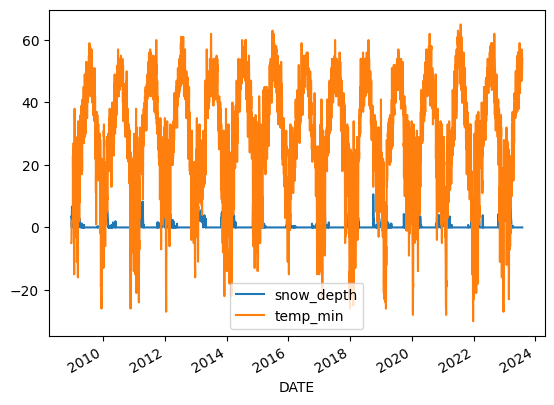

In [36]:
Calgary1c_df[["snow_depth","temp_min"]].plot()

<Axes: xlabel='DATE'>

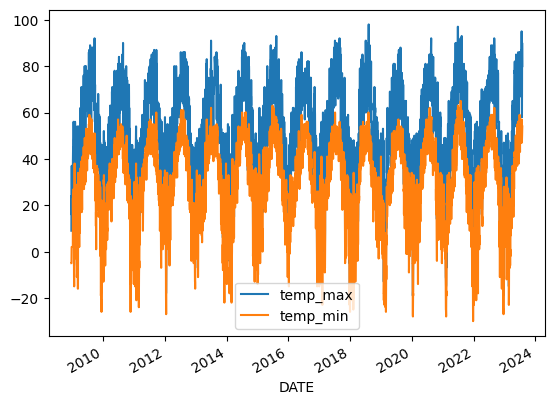

In [37]:
Calgary1c_df[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

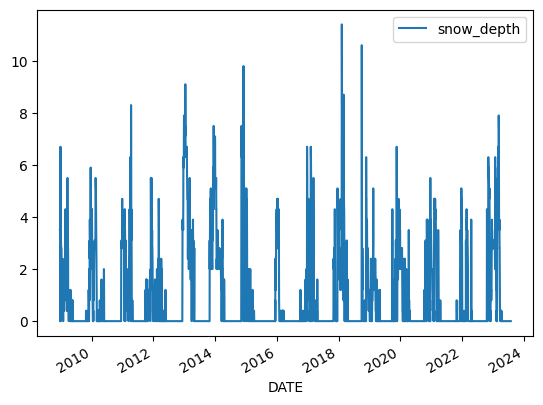

In [29]:
# plot of snow_depth after filling
Calgary1c_df[["snow_depth"]].plot()

<Axes: xlabel='DATE'>

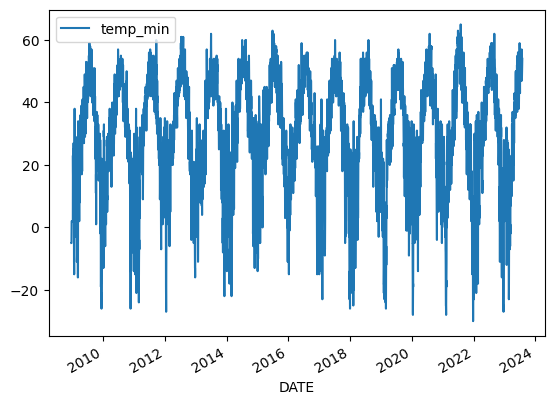

In [30]:
Calgary1c_df[["temp_min"]].plot()

In [31]:
# checking total weather condition per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

,STATION,Name,precip,snow_depth,temp_max,temp_min
DATE,,,,,,
2008,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",0.10,31.7,184.0,4.0
2009,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",9.45,240.5,18212.0,9808.0
2010,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",13.02,226.1,18299.0,10513.0
2011,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.95,343.0,17969.0,10437.0
2012,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.49,171.7,18623.0,10967.0
2013,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.09,730.8,16326.0,9300.0
2014,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",14.51,478.4,18147.0,10741.0
2015,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",25.90,121.7,19518.0,11657.0
2016,CA003031094CA003031094CA003031094CA003031094CA...,"CALGARY INTERNATIONAL CS, AB CACALGARY INTERNA...",16.34,168.4,18921.0,11047.0


In [32]:
#temp_max per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["temp_max"]

DATE
2008      184.0
2009    18212.0
2010    18299.0
2011    17969.0
2012    18623.0
2013    16326.0
2014    18147.0
2015    19518.0
2016    18921.0
2017    18771.0
2018    18071.0
2019    17630.0
2020    18533.0
2021    19008.0
2022    18952.0
2023    11328.0
Name: temp_max, dtype: float64

In [33]:
#prep per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["precip"]

DATE
2008     0.10
2009     9.45
2010    13.02
2011    14.95
2012    14.49
2013    16.09
2014    14.51
2015    25.90
2016    16.34
2017    13.43
2018    13.24
2019    16.88
2020    18.83
2021    10.89
2022    12.98
2023     6.48
Name: precip, dtype: float64

<Axes: xlabel='DATE'>

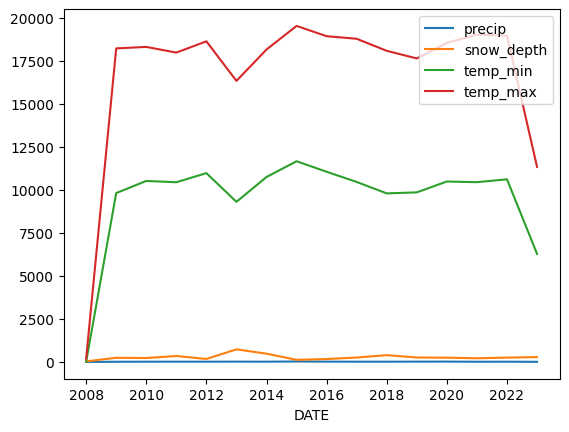

In [44]:
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()[["precip", "snow_depth", "temp_min", "temp_max"]].plot()

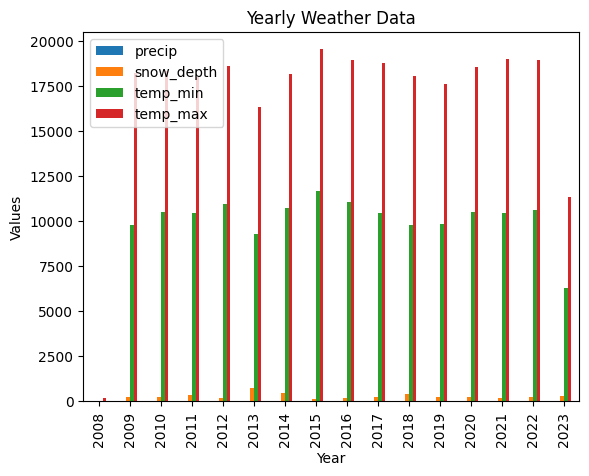

In [34]:
import matplotlib.pyplot as plt

# Group data by year and sum columns
yearly_sum = Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

# Plot as bar charts
yearly_sum[["precip", "snow_depth", "temp_min", "temp_max"]].plot(kind='bar')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Yearly Weather Data')

# Display the plot
plt.show()


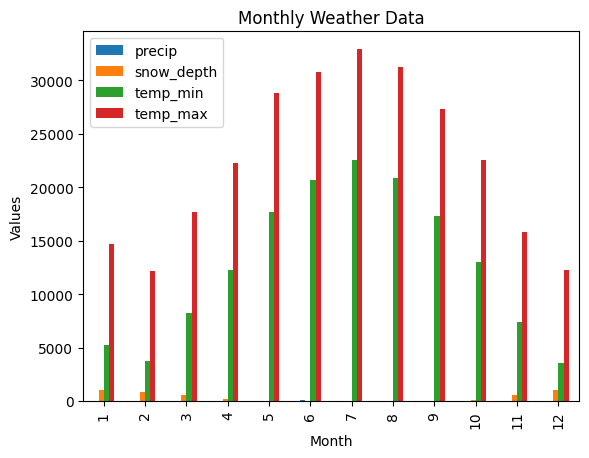

In [35]:
import matplotlib.pyplot as plt

# Group data by month and sum columns
monthly_sum = Calgary1c_df.groupby(Calgary1c_df.index.month).sum()

# Plot as bar charts
monthly_sum[["precip", "snow_depth", "temp_min", "temp_max"]].plot(kind='bar')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Weather Data')

# Display the plot
plt.show()


<Axes: xlabel='DATE'>

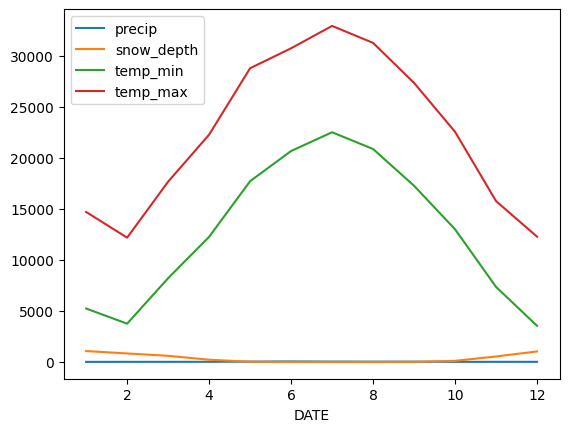

In [36]:
Calgary1c_df.groupby(Calgary1c_df.index.month).sum()[["precip", "snow_depth", "temp_min", "temp_max"]].plot()

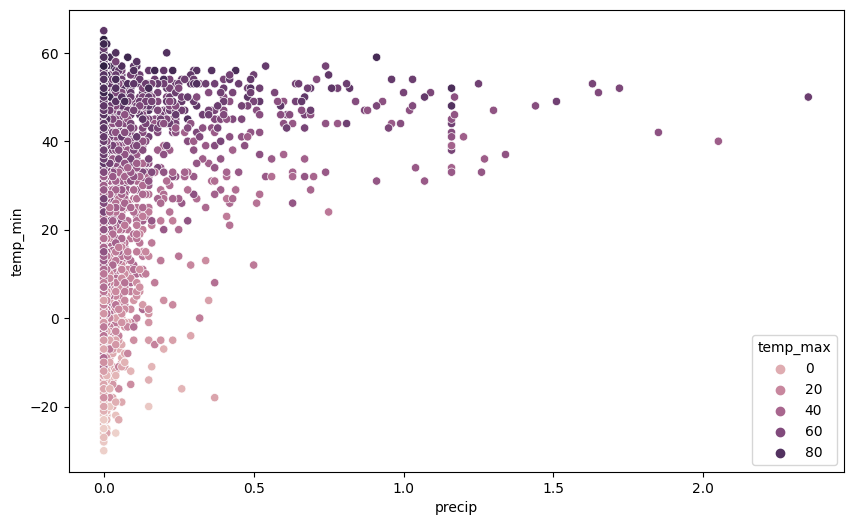

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt_fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=Calgary1c_df, x='precip', y='temp_min', hue='temp_max')

plt.show()


In [47]:
Calgary1c_df.to_csv('CalgaryCleanData.csv')

In [38]:
predictors_columns = ["precip", "snow_depth", "temp_max", "temp_min"]
Calgary1c_predictors_df = Calgary1c_df[predictors_columns]


In [39]:
Calgary1c_predictors_df 

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2008-12-23,0.00,3.5,9.0,-5.0
2008-12-24,0.00,3.5,24.0,-5.0
2008-12-25,0.00,3.5,16.0,2.0
2008-12-26,0.00,3.5,27.0,2.0
2008-12-27,0.00,0.0,37.0,2.0
...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0
2023-07-29,0.00,0.0,77.0,50.0
2023-07-30,0.00,0.0,90.0,51.0


In [40]:
import pandas as pd
predictors_columns = ["precip","snow_depth","temp_max", "temp_min"]
# Grouping by 'Year' and 'Month' and calculating the mean values for weather features
yearmonth_weather_avg = Calgary1c_predictors_df.groupby([Calgary1c_predictors_df.index.year,Calgary1c_predictors_df.index.month])[predictors_columns].mean()

# Displaying the calculated averages
yearmonth_weather_avg


precip  snow_depth   temp_max   temp_min
DATE DATE                                            
2008 12    0.011111    3.522222  20.444444   0.444444
2009 1     0.004194    1.716129  31.064516   9.161290
     2     0.005357    1.542857  28.928571   9.428571
     3     0.039355    1.706452  34.161290  13.096774
     4     0.005000    0.480000  49.166667  26.033333
...             ...         ...        ...        ...
2023 4     0.008000    0.133333  52.266667  27.300000
     5     0.031613    0.000000  71.677419  43.612903
     6     0.082000    0.000000  72.833333  47.300000
     7     0.052581    0.000000  77.064516  51.064516
     8     0.000000    0.000000  80.000000  54.000000

[177 rows x 4 columns]

<Axes: xlabel='DATE,DATE'>

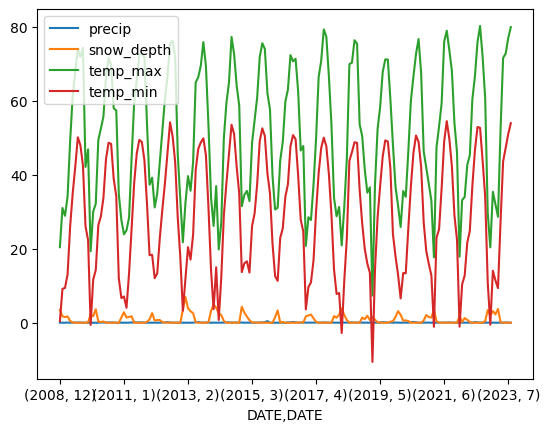

In [41]:
yearmonth_weather_avg.plot()

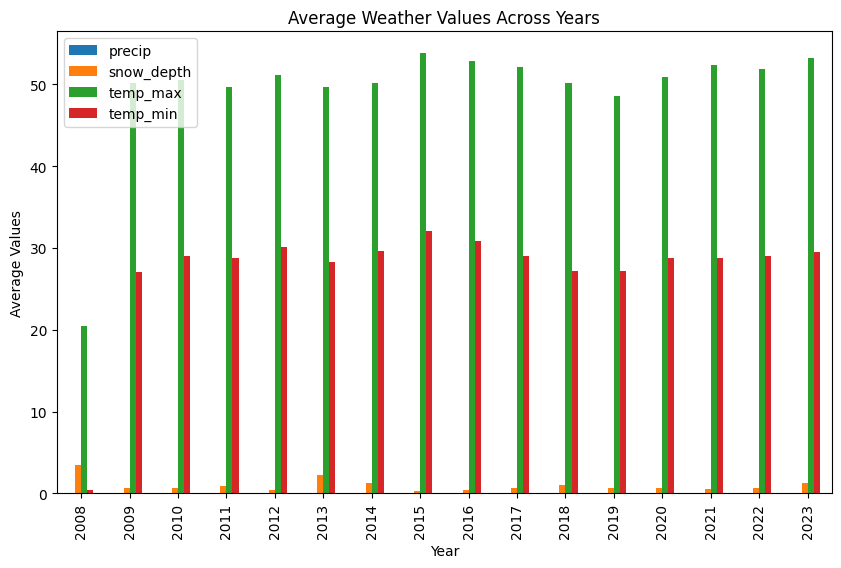

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# List of weather features
predictors_columns = ["precip", "snow_depth", "temp_max", "temp_min"]

# Grouping by 'Year' and 'Month' and calculating the mean values for weather features
yearmonth_weather_avg = Calgary1c_predictors_df.groupby([Calgary1c_predictors_df.index.year])[predictors_columns].mean()

# Plotting the data as bar charts
yearmonth_weather_avg.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Average Weather Values Across Years')

# Display the plot
plt.show()


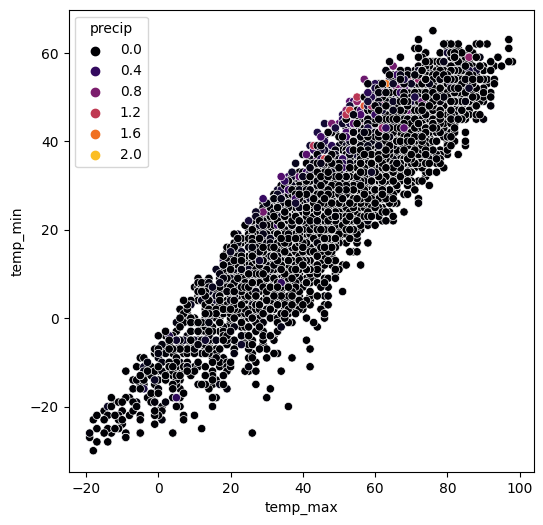

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x='temp_max', y='temp_min', hue='precip', palette='inferno', data=Calgary1c_predictors_df )

plt.show()


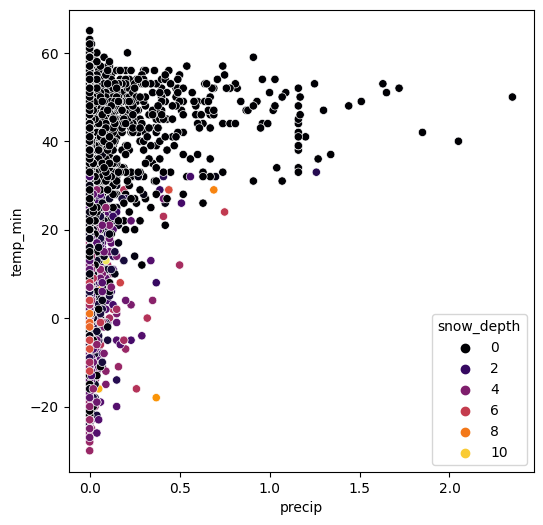

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x='precip', y='temp_min', hue='snow_depth', palette='inferno', data=Calgary1c_predictors_df )

plt.show()


In [54]:
#Compute the correlation matrix
corr= Calgary1c_predictors_df.corr()
corr

,precip,snow_depth,temp_max,temp_min
precip,1.000000,-0.072822,0.040950,0.155116
snow_depth,-0.072822,1.000000,-0.564854,-0.591325
temp_max,0.040950,-0.564854,1.000000,0.918778
temp_min,0.155116,-0.591325,0.918778,1.000000


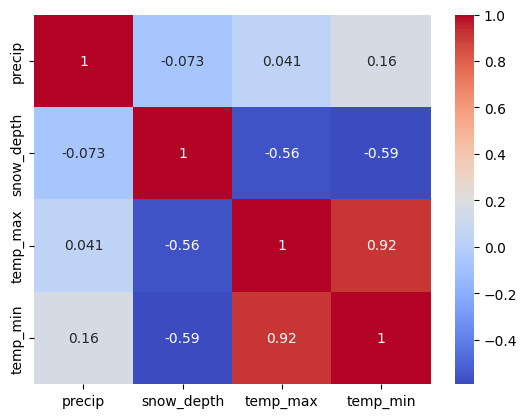

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix


# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [56]:
Calgary1c_predictors_df.describe()

,precip,snow_depth,temp_max,temp_min
count,5260.000000,5260.000000,5260.000000,5260.000000
mean,0.041365,0.838042,51.044106,28.967681
std,0.145978,1.569271,21.479273,18.373109
min,0.000000,0.000000,-19.000000,-30.000000
25%,0.000000,0.000000,37.000000,18.000000
50%,0.000000,0.000000,53.000000,31.000000
75%,0.010000,1.200000,68.000000,44.000000
max,2.350000,11.400000,98.000000,65.000000


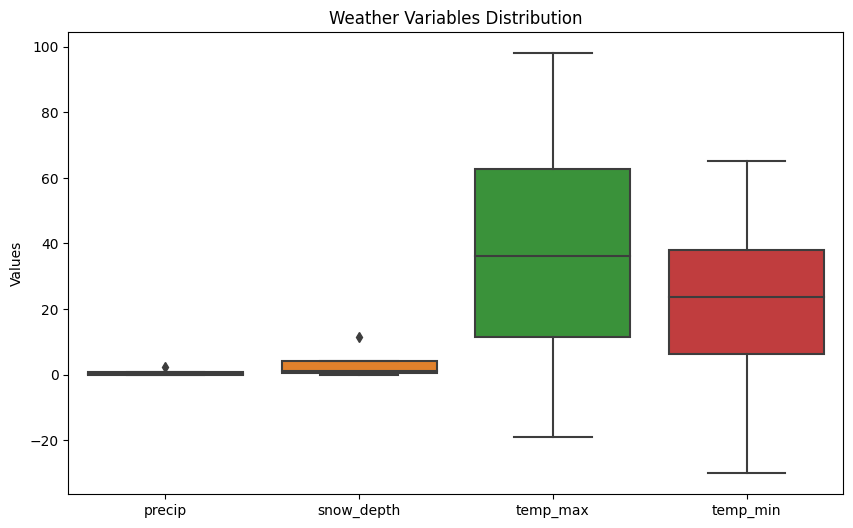

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute statistics for the numerical columns
stats = Calgary1c_predictors_df.describe().loc[["mean", "std", "min", "max"]]

# Create box plots using Seaborn with vertical orientation
plt.figure(figsize=(10, 6))
sns.boxplot(data=stats, orient="v")  # Change orient to "v"
plt.title("Weather Variables Distribution")
plt.ylabel("Values")  # Use ylabel instead of xlabel for vertical orientation
plt.show()


Note: From our domain knowledge of the area,scaling is not always necessary for weather data,Tree-Based Algorithms like decision trees, random forests, and gradient boosting trees are also typically not sensitive to the scale of the features.We can consider leaving them as they are.

trainning and spliting

In [59]:
X = Calgary1c_predictors_df.drop(['snow_depth'], axis =1)
y = Calgary1c_predictors_df['snow_depth']

In [60]:
X.head()

,precip,temp_max,temp_min
DATE,,,
2008-12-23,0.0,9.0,-5.0
2008-12-24,0.0,24.0,-5.0
2008-12-25,0.0,16.0,2.0
2008-12-26,0.0,27.0,2.0
2008-12-27,0.0,37.0,2.0


In [61]:
y.head()

DATE
2008-12-23    3.5
2008-12-24    3.5
2008-12-25    3.5
2008-12-26    3.5
2008-12-27    0.0
Name: snow_depth, dtype: float64

In [62]:
#import libraries spliting
from sklearn.model_selection import train_test_split
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape


((3682, 3), (1578, 3))

In [63]:
y_train.shape , y_test.shape

((3682,), (1578,))

#Models

In [66]:
#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression model
lr_model = LinearRegression()

# Fit the training data
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LinearRegression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


LinearRegression Metrics:
Mean Squared Error: 1.5038144241301028
Mean Absolute Error: 0.8332279470701504
R-squared: 0.37690187358340643


In [75]:
#Decision Tress Regressor
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model
dt_model = DecisionTreeRegressor(max_depth=3)

# Fit training data
dt_model.fit(X_train, y_train)

# predictions the testing data
y_pred = dt_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("DecisionTreeRegressor Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)



DecisionTreeRegressor Metrics:
Mean Squared Error: 1.4542586102877213
Mean Absolute Error: 0.7024699205071204
R-squared: 0.39743508184552245


In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an SVR model
svr_model = SVR(kernel='linear')  # You can choose different kernel functions

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Support Vector Regression Metrics:
Mean Squared Error: 1.9293707403541245
Mean Absolute Error: 0.7709526850167052
R-squared: 0.20057470244503828


In [68]:
#Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge Regression model
ridge_model = Ridge(alpha=0.1)  

# Fit training data
ridge_model.fit(X_train, y_train)

# Make predictions for the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Metrics:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Ridge Regression Metrics:
Mean Squared Error: 1.5038137003666585
Mean Absolute Error: 0.8332276125384601
R-squared: 0.37690217347123767


In [65]:
ridge_model.coef_

array([-0.03965861, -0.01138498, -0.03767093])

Text(0.5, 1.0, 'Ridge Regression model')

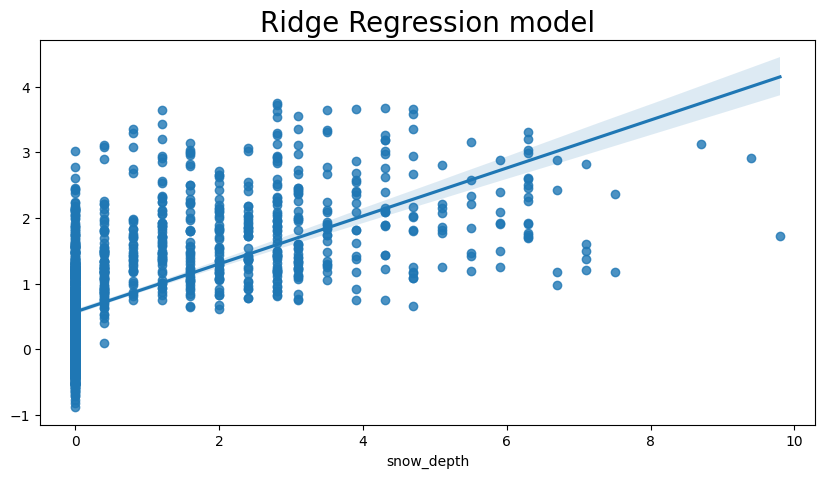

In [66]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Ridge Regression model', fontsize = 20)

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge


# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha

# Perform cross-validation with Mean Squared Error (mse) as the scoring metric
# You can replace 'neg_mean_squared_error' with other scoring metrics like 'r2'
cross_val_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
positive_scores = -cross_val_scores

# Print the cross-validation scores
print("Cross-Validation Scores (MSE):", positive_scores)
print("Mean Cross-Validation Score (MSE):", np.mean(positive_scores))


Cross-Validation Scores (MSE): [1.06062604 2.91069583 1.39610484 1.34497249 1.46753629]
Mean Cross-Validation Score (MSE): 1.6359870970023702


Based on these matrics, the Ridge Regression Metrics appears to perform slightly better than the Linear Regression model in terms of both MSE and MAE, while also having a slightly higher R-squared value. This suggests that the Decision Tree Regression model might capture the underlying patterns in this data more effectively. however,we also experiment with other regression algorithms like RandomForestRegressor and GradientBoostingRegressor to see which one performs better for this dataset. it is important to further analyze and  explore feature engineering, hyperparameter tuning, cross-validation, more data cleaning and consider the broader context of this analysis before making a final decision.

ensemble

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
# Fit the training data
rf_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the evaluation metrics for RandomForestRegressor
print("RandomForestRegressor Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


RandomForestRegressor Metrics:
Mean Squared Error: 1.5318216091407089
Mean Absolute Error: 0.7055178282941078
R-squared: 0.36529723392422353


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2)
# Fit the model to the training data
gb_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Print the evaluation metrics for GradientBoostingRegressorMetrics
print("GradientBoostingRegressorMetrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


GradientBoostingRegressorMetrics:
Mean Squared Error: 1.4191311300688143
Mean Absolute Error: 0.7001888427410012
R-squared: 0.411989980880221


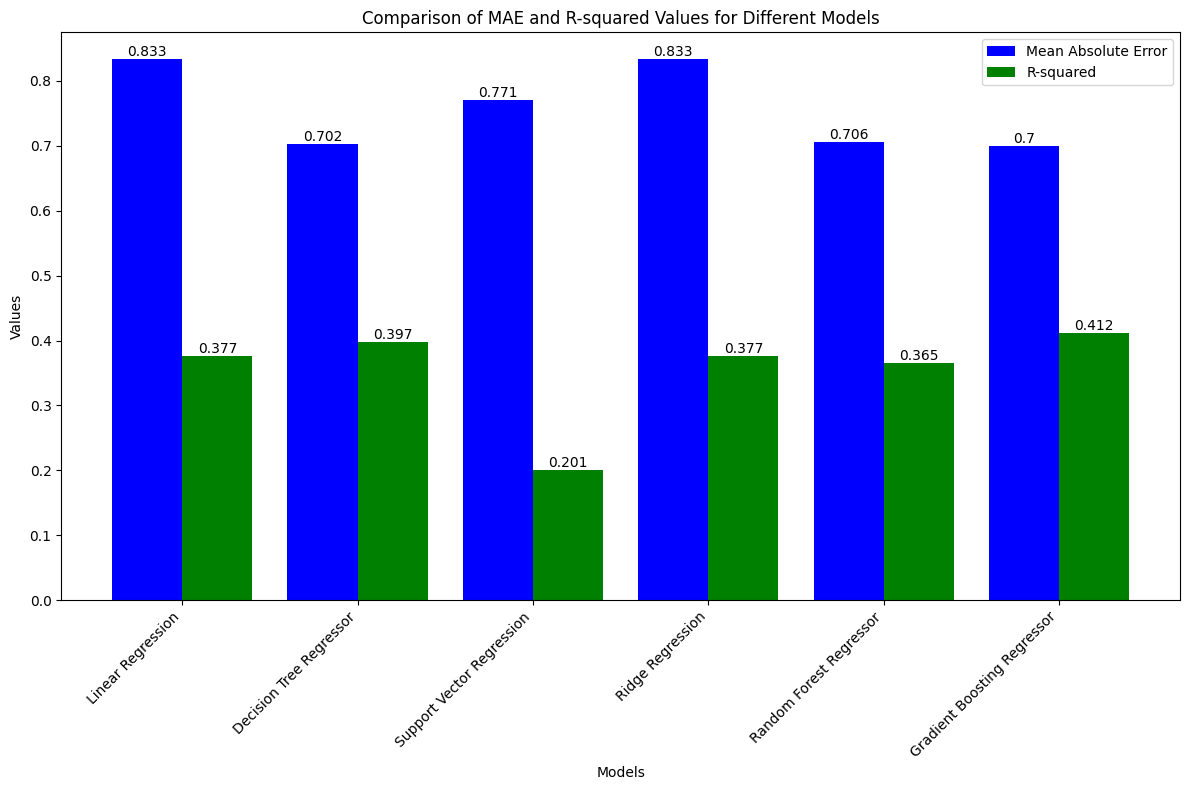

In [77]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    'Linear Regression', 
    'Decision Tree Regressor', 
    'Support Vector Regression', 
    'Ridge Regression', 
    'Random Forest Regressor', 
    'Gradient Boosting Regressor'
]

mae_values = [
    0.8332279470701504,
    0.7024699205071204,
    0.7709526850167052,
    0.8332276125384601,
    0.7055178282941078,
    0.7001888427410012
]

r2_values = [
    0.37690187358340643,
    0.39743508184552245,
    0.20057470244503828,
    0.37690217347123767,
    0.36529723392422353,
    0.411989980880221
]

bar_width = 0.4
index = np.arange(len(models))

plt.figure(figsize=(12, 8))

# MAE and R-squared comparison
bars1 = plt.bar(index, mae_values, bar_width, label='Mean Absolute Error', color='blue')
bars2 = plt.bar(index + bar_width, r2_values, bar_width, label='R-squared', color='green')

plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Comparison of MAE and R-squared Values for Different Models')
plt.xticks(index + bar_width / 2, models, rotation=45, ha='right')
plt.legend()

# Adding annotations to the bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height(), round(bar1.get_height(), 3), 
             ha='center', va='bottom', color='black', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height(), round(bar2.get_height(), 3), 
             ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


Comparing the metrics, the GradientBoostingRegressor outperforms the RandomForestRegressor in terms of all three metrics: lower MSE, slightly lower MAE, and higher R-squared. This indicates that the GradientBoostingRegressor is better capturing the patterns in the data and providing more accurate predictions,but it's important to  perform additional model tuning or exploration to ensure the best possible fit in the ensemble.The model with the lowest MAE and highest R-squared value is considered the best model in this context.

hypertuning of the parameters using Gridsearch

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best GradientBoostingRegressor Metrics:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best GradientBoostingRegressor Metrics:
Mean Squared Error: 1.4283396219340374
R-squared: 0.4081744874680854


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor()  # You can adjust hyperparameters

# Perform cross-validation with Mean Squared Error (mse) as the scoring metric
# You can replace 'neg_mean_squared_error' with other scoring metrics like 'r2'
cross_val_scores = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
positive_scores = -cross_val_scores

# Print the cross-validation scores
print("Cross-Validation Scores (MSE):", positive_scores)
print("Mean Cross-Validation Score (MSE):", np.mean(positive_scores))


These values indicate a better average performance of the model. The lower mean MSE suggests that the gradient boosting regressor model is making more accurate predictions, resulting in less squared differences between predicted and actual values.

In [80]:
#we can view the feature scores of best_rf_model
feature_scores = pd.Series(best_gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

temp_min    0.842534
temp_max    0.138820
precip      0.018646
dtype: float64

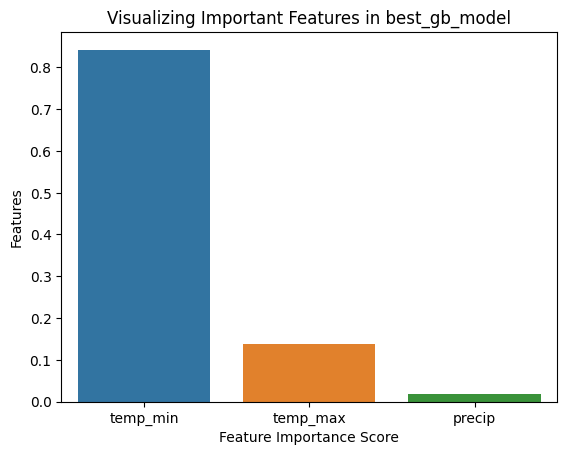

In [82]:
#we can visualize the feature scores with matplotlib and seaborn.
# Creating a seaborn bar plot
sns.barplot(x=feature_scores.index, y=feature_scores)

# Adding labels 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title 
plt.title("Visualizing Important Features in best_gb_model")

# Visualize
plt.show()

it is obvious that this can be used to make predictions

In this case, the "Best GradientBoostingRegressor" model seems to perform better based on the R-squared value, which indicates how well the model's predictions match the actual values. A higher R-squared value indicates a better fit to the data. Therefore, the "Best GradientBoostingRegressor" model with an R-squared value of 0.4082 is better than the "RandomForestRegressor" model with an R-squared value of 0.3607.

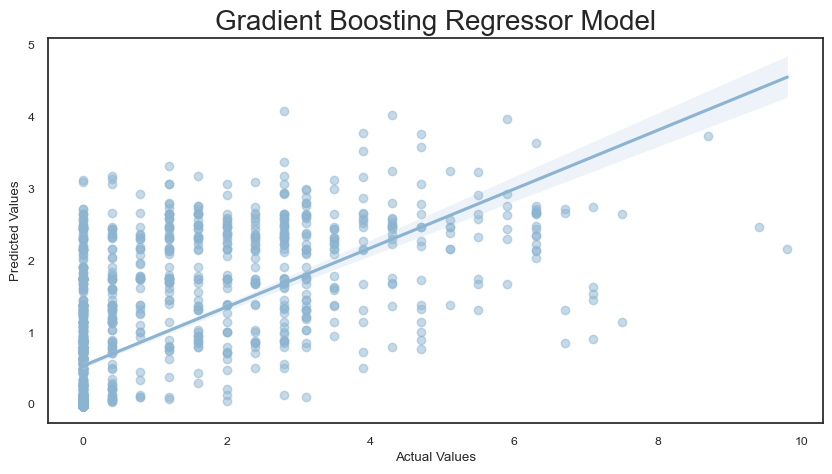

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.title('Gradient Boosting Regressor Model', fontsize=20)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Based on these metrics, the Gradient Boosting Regressor performs better in terms of both MAE and R². It has a lower MAE and a higher R², which suggests that it's providing better predictions and explaining more of the variance in the data compared to the other model. Therefore, for our weather data model, the Gradient Boosting Regressor seems to be a better choice.

In [84]:
#best trained gradient model saved to pickle
import pickle
# Save the model to a file using pickle
with open('best_gb_model.pkl', 'wb') as model_file:
    pickle.dump(best_gb_model, model_file)


In [87]:

# Load the model from the file
with open('best_gb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use the loaded_model for predictions
new_X = [[0.1, 0.2, 0.3], [0.3, 0.4, 0.5]]
predictions = loaded_model.predict(new_X)

print("Predictions:", predictions)

Predictions: [2.39441863 2.83755122]


c:\Users\layin\anaconda3\envs\test_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [89]:
X_test.to_csv('Xtest.csv', index=False)

In [90]:
X_test.to_csv('X1test.csv', index=True)

===================================================================================================================================

# Exploring  more feature engineering by creating more predictors, and considering the broader context of this analysis before making a final decision. lets start with predicting tomorrows snow_depth. Target variable = snow_depth while others are the predictors: predict a target value based on the previous values of a feature (in this case, ""snow_depth").

use  original dataframe that include date for the following stepd when adding parameters (Calgary1c_df)

In [91]:
 #target is temp_max
Calgary1c_df["target"] = Calgary1c_df. shift(-1)["snow_depth"]# replace value one that was originally the row bellow. eg, assign tomorrows value to today.

In [92]:
Calgary1c_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,3.5
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,3.5
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,3.5
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,0.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,0.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,0.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,0.0


 the above predicted tomorrows snow_depth from today eg the target (0.00) of 2008-12-24 is tomorrows  (0). it helps predict tomorrows precip

Notice the last target for 2023-08-1 has NAN this is because the last data i downloaded was on that day,we will can fill the data with the previous value. ((   'r' in Calgary1cf_df mean fill))

In [93]:
Calgary1cf_df= Calgary1c_df.ffill()

In [94]:
Calgary1cf_df

,STATION,Name,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,,,
2008-12-23,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,9.0,-5.0,3.5
2008-12-24,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,24.0,-5.0,3.5
2008-12-25,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,16.0,2.0,3.5
2008-12-26,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,3.5,27.0,2.0,0.0
2008-12-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...,...,...
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,0.0,58.0,49.0,0.0
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,77.0,50.0,0.0
2023-07-30,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,0.0,90.0,51.0,0.0


In [96]:
Calgary1cfs_df= Calgary1cf_df[['precip','snow_depth','temp_max','temp_min','target']]

In [97]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,3.5
2008-12-24,0.00,3.5,24.0,-5.0,3.5
2008-12-25,0.00,3.5,16.0,2.0,3.5
2008-12-26,0.00,3.5,27.0,2.0,0.0
2008-12-27,0.00,0.0,37.0,2.0,3.9
...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0
2023-07-29,0.00,0.0,77.0,50.0,0.0
2023-07-30,0.00,0.0,90.0,51.0,0.0


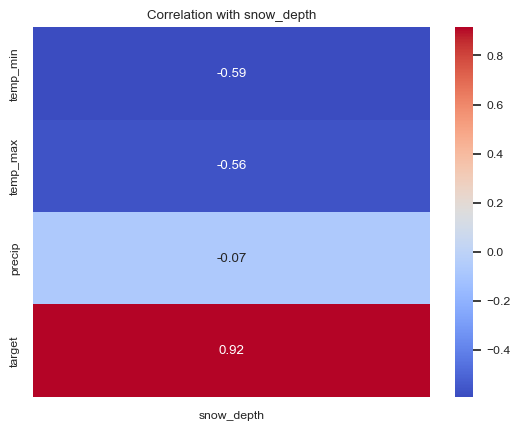

In [98]:
corr = Calgary1cfs_df.corr()
target_corr = corr['snow_depth'].drop('snow_depth')

target_corr_sorted = target_corr.sort_values(ascending=True)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with snow_depth')
plt.show()

In [78]:
#Compute the correlation matrix
corr= Calgary1cfs_df.corr()
corr

,precip,snow_depth,temp_max,temp_min,target
precip,1.000000,-0.072822,0.040950,0.155116,-0.034816
snow_depth,-0.072822,1.000000,-0.564854,-0.591325,0.915398
temp_max,0.040950,-0.564854,1.000000,0.918778,-0.585227
temp_min,0.155116,-0.591325,0.918778,1.000000,-0.599270
target,-0.034816,0.915398,-0.585227,-0.599270,1.000000


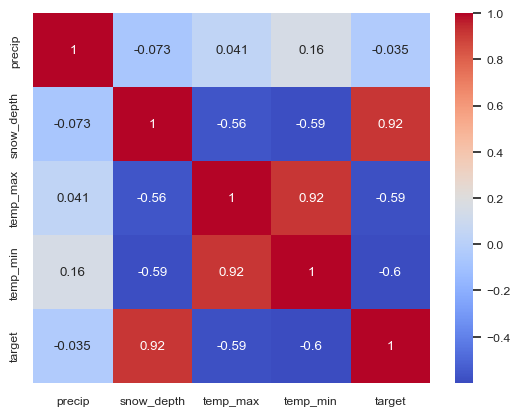

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix


# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

=========================================================================================================================

we are going to be trying 2 models at this stage Ridge regression model And Gradient Boost Regressor

Prediction using a ridge model

Application of machine learning.
ridge regression model penalizes coefficients to account for multi-collinearity.

use regression model because it reduces overfitting

In [101]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength) default value

# select columns in this list except the target. ~ meaning negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min'], dtype='object')

since it is a time series data, we will use time series cross validation or back testing to account for the time series nature of the data.. we have to be careful not to use today's  value to predict yesterday.

In [105]:
#for ridge regression
# the function  take in the data, model, predictors, start parameter  of 365 days before we start predictions and this is for a period of 30 days,
# we create a set of predictions and move on to the next 30 days.. this can be adjusted.

def backtest(Calgary1cfs_df, ridge_model, predictors, start=365, step=30):
    all_predictions = []

    for i in range(start, Calgary1cfs_df.shape[0], step):
        train = Calgary1cfs_df.iloc[:i, :]
        test = Calgary1cfs_df.iloc[i:i + step, :]

        ridge_model.fit(train[predictors], train["target"])

        preds = ridge_model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)

    return pd.concat(all_predictions)


In [106]:
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)
predictions

,actual,prediction,diff
DATE,,,
2009-12-25,2.4,2.168004,0.231996
2009-12-26,2.4,2.044301,0.355699
2009-12-27,2.0,2.036192,0.036192
2009-12-28,2.4,1.835394,0.564606
2009-12-29,2.4,2.147724,0.252276
...,...,...,...
2023-07-28,0.0,0.104629,0.104629
2023-07-29,0.0,-0.091420,0.091420
2023-07-30,0.0,-0.170331,0.170331


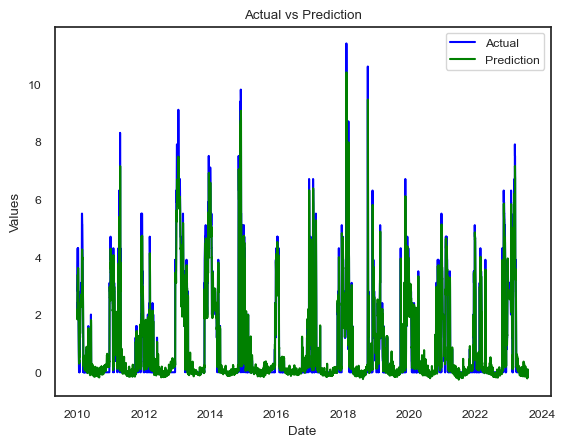

In [107]:
import matplotlib.pyplot as plt
# Call the backtest function
combined_df = backtest(Calgary1cfs_df, ridge_model, predictors)

# Plotting the 'actual' and 'prediction' columns with different colors
plt.plot(combined_df.index, combined_df['actual'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['prediction'], label='Prediction', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Prediction')
plt.legend()

# Display the plot
plt.show()


In [108]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(predictions["actual"], predictions["prediction"])

# Calculate R-squared
r2= r2_score(predictions["actual"], predictions["prediction"])

# Calculate Root Mean Squared Error
rmse = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)

# Print the results
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")


Mean Absolute Error: 0.28080
R-squared: 0.84912
Root Mean Squared Error: 0.61915


In [109]:
ridge_model.coef_

array([ 0.37088588,  0.85875514, -0.00592395, -0.00189918])

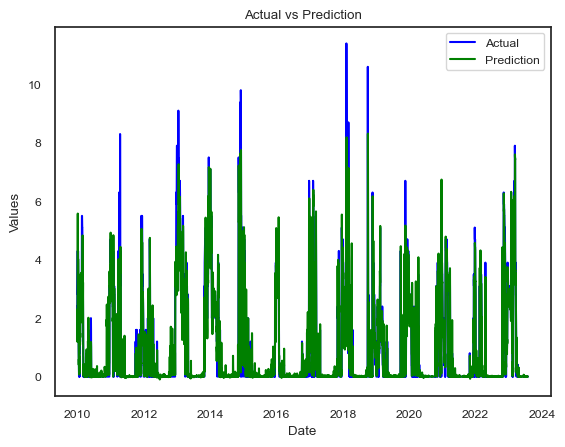

In [110]:
# for a gradientboostregressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

def backtest(Calgary1cfs_df, model, predictors, start=365, step=30):
    all_predictions = []

    for i in range(start, Calgary1cfs_df.shape[0], step):
        train = Calgary1cfs_df.iloc[:i, :]
        test = Calgary1cfs_df.iloc[i:i+step, :]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)

    return pd.concat(all_predictions)

# Initialize Gradient Boosting Regressor
gradient_boost_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Call the backtest function
combined_df = backtest(Calgary1cfs_df, gradient_boost_model, predictors)

# Plotting the 'actual' and 'prediction' columns with different colors
plt.plot(combined_df.index, combined_df['actual'], label='Actual', color='blue')
plt.plot(combined_df.index, combined_df['prediction'], label='Prediction', color='green')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Prediction')
plt.legend()

# Display the plot
plt.show()


In [111]:
# for gradient boost
predictions = backtest(Calgary1cfs_df, gradient_boost_model, predictors)
predictions

,actual,prediction,diff
DATE,,,
2009-12-25,2.4,2.292531,0.107469
2009-12-26,2.4,1.744212,0.655788
2009-12-27,2.0,1.983242,0.016758
2009-12-28,2.4,1.504395,0.895605
2009-12-29,2.4,1.192019,1.207981
...,...,...,...
2023-07-28,0.0,0.009592,0.009592
2023-07-29,0.0,0.002890,0.002890
2023-07-30,0.0,0.002890,0.002890


The diff show the  how accurate our prediction is we will import mean_absolute_error

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Calculate Mean Absolute Error
mae_gb = mean_absolute_error(predictions["actual"], predictions["prediction"])

# Calculate Root Mean Squared Error
rmse_gb = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)

# Calculate R-squared
r2_gb = r2_score(predictions["actual"], predictions["prediction"])

# Print the results
print(f"Mean Absolute Error: {mae_gb:.5f}")
print(f"Root Mean Squared Error: {rmse_gb:.5f}")
print(f"R-squared: {r2_gb:.5f}")


Mean Absolute Error: 0.26395
Root Mean Squared Error: 0.66169
R-squared: 0.82767


In summary, your calculated MAE value of 0.26395 suggests that, on average, the absolute difference between the predicted and actual values is approximately 0.26395 units. Lower MAE values  in the gradient boost regressor MAE indicate better model performance in terms of accuracy and closeness of predictions to the actual values. to that of ridge regressor which is 0.28080

on average, we are 8.2 degrees off in our prediction.

===========================================================================================================================
===========================================================================================================================

how to improve our accuracy. calculate the average temperature and precipitation in the past few days, 3,14 days and looking how the current day compare to those days.

  Rolling mean or moving average, is a statistical calculation used to analyze and smooth out fluctuations in time-series data. It involves taking the average of a set of consecutive data points over a specified period of time (rolling window) and plotting these averages at corresponding time points. we will be exploring it for our 3,7 and 14 days predictions
  

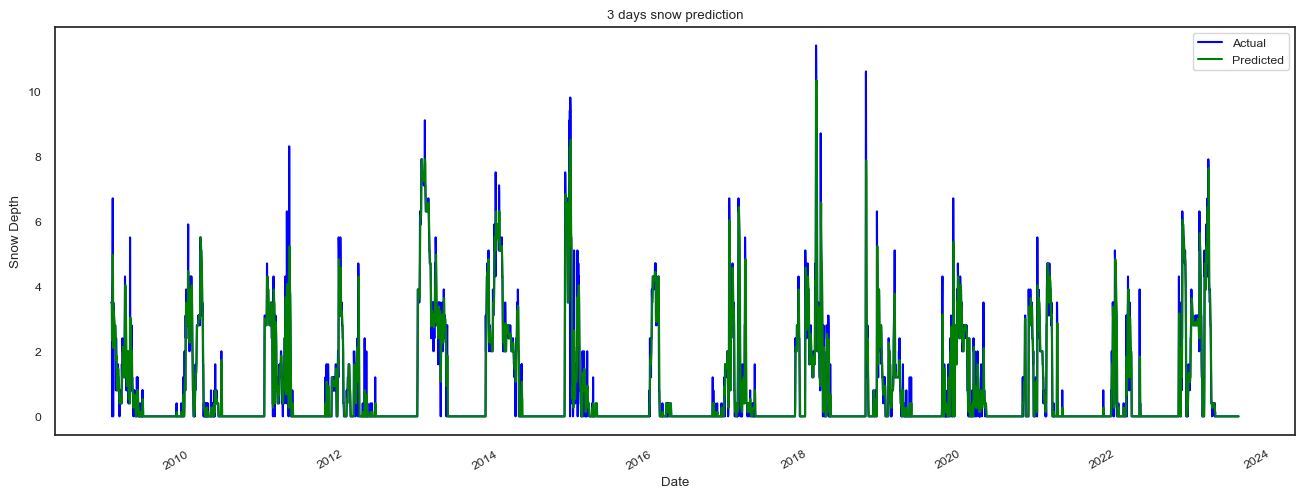

In [114]:
# 3 days prediction using rolling mean
import matplotlib.pyplot as plt

# create the plots
Calgary1cfs_df['snow_depth'].plot(label='Actual', color='blue')
Calgary1cfs_df.rolling(window=3).mean()['snow_depth'].plot(figsize=(16, 6), label='Predicted', color='green')

# Adding labels
plt.xlabel('Date')
plt.ylabel('Snow Depth')

# Adding a title
plt.title('3 days snow prediction')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


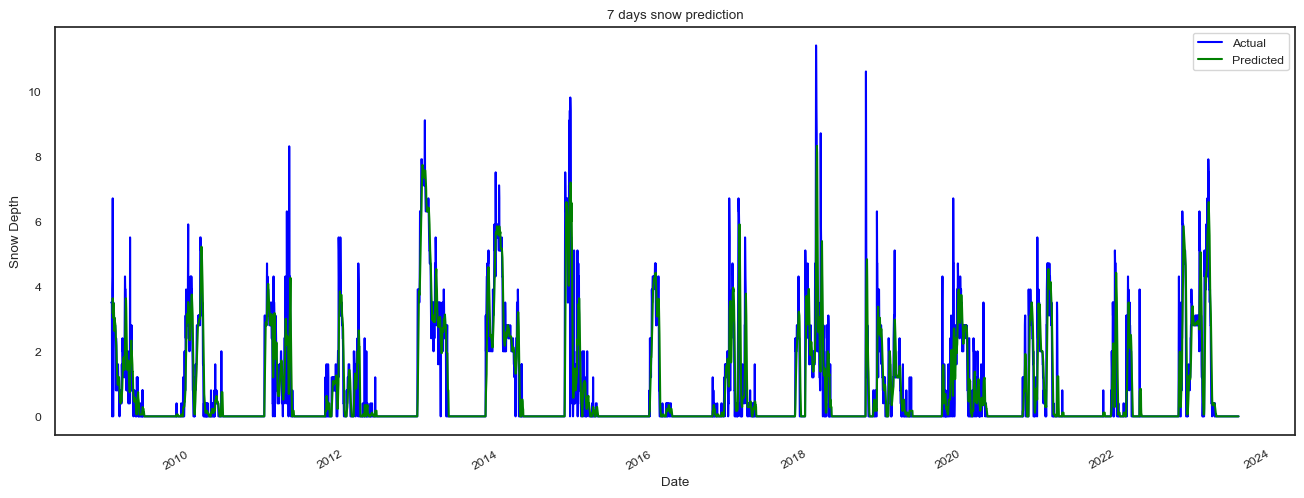

In [115]:
# 7 days prediction using rolling mean
import matplotlib.pyplot as plt

# create the plots
Calgary1cfs_df['snow_depth'].plot(label='Actual', color='blue')
Calgary1cfs_df.rolling(window=7).mean()['snow_depth'].plot(figsize=(16, 6), label='Predicted', color='green')

# Adding labels
plt.xlabel('Date')
plt.ylabel('Snow Depth')

# Adding a title
plt.title('7 days snow prediction')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


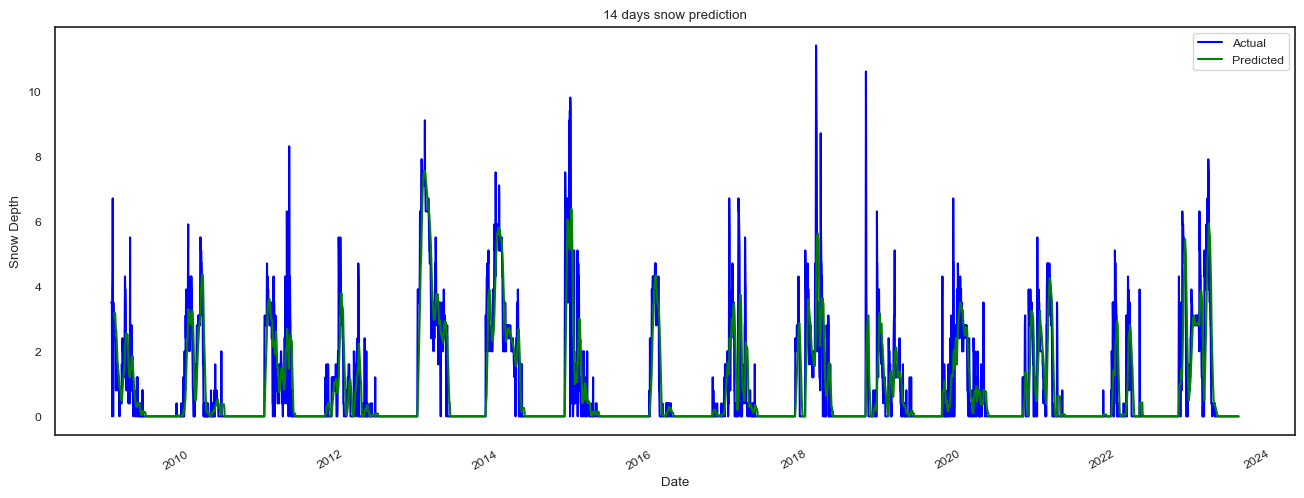

In [116]:
# 14 days prediction using rolling mean
import matplotlib.pyplot as plt

# create the plots
Calgary1cfs_df['snow_depth'].plot(label='Actual', color='blue')
Calgary1cfs_df.rolling(window=14).mean()['snow_depth'].plot(figsize=(16, 6), label='Predicted', color='green')

# Adding labels
plt.xlabel('Date')
plt.ylabel('Snow Depth')

# Adding a title
plt.title('14 days snow prediction')

# Adding a legend
plt.legend()

# Display the plot
plt.show()


In [118]:
def pct_diff(old, new):
    return (new - old) / old  # return new minus old divided by old.

def compute_rolling(Calgary1cfs_df, horizon, col):
    label = f"rolling_{horizon}_{col}"  # to create a label.... used to create a dynamic string
    Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon
    Calgary1cfs_df[f"{label}_pct"] = pct_diff(Calgary1cfs_df[label], Calgary1cfs_df[col])  # to find percentage difference between the current day and the rolling

rolling_horizons = [3,7,14]
for horizon in rolling_horizons:
    for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
        compute_rolling(Calgary1cfs_df, horizon, col)
        
Calgary1cfs_df


C:\Users\layin\AppData\Local\Temp\ipykernel_7888\1777806695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Calgary1cfs_df[label] = Calgary1cfs_df[col].rolling(horizon).mean()  # note that rolling mean takes the values from previous dates to calculate over the horizon


,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_7_temp_min,rolling_7_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2008-12-23,0.00,3.5,9.0,-5.0,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-24,0.00,3.5,24.0,-5.0,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-25,0.00,3.5,16.0,2.0,3.5,0.000000,NaN,3.500000,0.0,16.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-26,0.00,3.5,27.0,2.0,0.0,0.000000,NaN,3.500000,0.0,22.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-12-27,0.00,0.0,37.0,2.0,3.9,0.000000,NaN,2.333333,-1.0,26.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.000000,NaN,66.000000,...,52.428571,-0.065395,0.048571,3.529412,0.0,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.000000,NaN,66.666667,...,51.857143,-0.035813,0.045714,-1.000000,0.0,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.000000,NaN,75.000000,...,51.000000,0.000000,0.045714,-1.000000,0.0,NaN,78.428571,0.147541,51.428571,-0.008333


the rolling mean calculates the average of a subset of data points within a specific window.it identify trends or patterns in time series data, the rolling mean can be helpful for smoothing out noise.


cut off the first 14 days with missing valuea because there is no prediction for them.

In [119]:
Calgary1cfs_df = Calgary1cfs_df.iloc[14:,:]

In [120]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_7_temp_min,rolling_7_temp_min_pct,rolling_14_precip,rolling_14_precip_pct,rolling_14_snow_depth,rolling_14_snow_depth_pct,rolling_14_temp_max,rolling_14_temp_max_pct,rolling_14_temp_min,rolling_14_temp_min_pct
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,NaN,3.0,-0.066667,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.128571,-0.105023,19.785714,-0.140794,1.500000,0.333333
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,NaN,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.010714,-1.000000,3.078571,-0.090487,19.285714,-0.118519,2.000000,0.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.012143,0.647059,3.028571,-0.075472,19.357143,-0.121771,2.000000,0.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.013571,0.473684,2.978571,-0.059952,20.000000,0.800000,2.000000,0.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,5.000000,3.600000,0.013571,-1.000000,3.178571,-0.119101,20.142857,0.936170,3.500000,5.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,NaN,66.000000,...,52.428571,-0.065395,0.048571,3.529412,0.000000,NaN,77.857143,-0.255046,51.928571,-0.056396
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,NaN,66.666667,...,51.857143,-0.035813,0.045714,-1.000000,0.000000,NaN,77.785714,-0.010101,51.642857,-0.031812
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,NaN,75.000000,...,51.000000,0.000000,0.045714,-1.000000,0.000000,NaN,78.428571,0.147541,51.428571,-0.008333


some NAN is still in the percentage columns(pct)  and we have to solve them by filling them with 0 in the next cell

In [124]:
Calgary1cfs_df =Calgary1cfs_df.fillna(0)

Add more predictions

In [125]:
# add month average and day averages.
def expand_mean(x):
    return x.expanding(1).mean()

for col in ["precip", "snow_depth", "temp_max", "temp_min"]:
    Calgary1cfs_df[f"month_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.month)[col].apply(expand_mean).reset_index(level=0, drop=True)#(drop original index so it aligns with original df when assigning values back)
    Calgary1cfs_df[f"day_avg_{col}"] = Calgary1cfs_df.groupby(Calgary1cfs_df.index.day_of_year)[col].apply(expand_mean).reset_index(level=0, drop=True)


In [123]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.8,2.8,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.8,2.8,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.0,0.0,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.0,0.0,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.0,0.0,74.831435,81.000000,51.157175,50.928571


In [126]:
Calgary1cfs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5246 entries, 2009-01-06 to 2023-08-01
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   precip                     5246 non-null   float64
 1   snow_depth                 5246 non-null   float64
 2   temp_max                   5246 non-null   float64
 3   temp_min                   5246 non-null   float64
 4   target                     5246 non-null   float64
 5   rolling_3_precip           5246 non-null   float64
 6   rolling_3_precip_pct       5246 non-null   float64
 7   rolling_3_snow_depth       5246 non-null   float64
 8   rolling_3_snow_depth_pct   5246 non-null   float64
 9   rolling_3_temp_max         5246 non-null   float64
 10  rolling_3_temp_max_pct     5246 non-null   float64
 11  rolling_3_temp_min         5246 non-null   float64
 12  rolling_3_temp_min_pct     5246 non-null   float64
 13  rolling_7_precip           524

Rerun our predictors, we have included some predictors lets see in our index.

In [127]:
#we can check our predictors now. .~ mean negation.
predictors = Calgary1cfs_df.columns[~Calgary1cfs_df.columns.isin(["target"])] 
predictors

Index(['precip', 'snow_depth', 'temp_max', 'temp_min', 'rolling_3_precip',
       'rolling_3_precip_pct', 'rolling_3_snow_depth',
       'rolling_3_snow_depth_pct', 'rolling_3_temp_max',
       'rolling_3_temp_max_pct', 'rolling_3_temp_min',
       'rolling_3_temp_min_pct', 'rolling_7_precip', 'rolling_7_precip_pct',
       'rolling_7_snow_depth', 'rolling_7_snow_depth_pct',
       'rolling_7_temp_max', 'rolling_7_temp_max_pct', 'rolling_7_temp_min',
       'rolling_7_temp_min_pct', 'rolling_14_precip', 'rolling_14_precip_pct',
       'rolling_14_snow_depth', 'rolling_14_snow_depth_pct',
       'rolling_14_temp_max', 'rolling_14_temp_max_pct', 'rolling_14_temp_min',
       'rolling_14_temp_min_pct', 'month_avg_precip', 'day_avg_precip',
       'month_avg_snow_depth', 'day_avg_snow_depth', 'month_avg_temp_max',
       'day_avg_temp_max', 'month_avg_temp_min', 'day_avg_temp_min'],
      dtype='object')

predictors

In [128]:
 #Check for infinity values in each column
inf_columns =Calgary1cfs_df.columns[Calgary1cfs_df.applymap(np.isinf).any()]


inf_columns

Index(['rolling_3_temp_max_pct', 'rolling_3_temp_min_pct',
       'rolling_7_temp_min_pct', 'rolling_14_temp_min_pct'],
      dtype='object')

it needs cleaning because of this infinity in the columns, so it has to be dealth with by fill for our backtesting function to work. this ts done in the next cell.

In [129]:


Calgary1cfs_df = Calgary1cfs_df.replace([np.inf, -np.inf], np.nan)# code replace all infinite values with NAN using replace and then fill  with previous non nan value along the columns.
Calgary1cfs_df = Calgary1cfs_df.ffill()


In [130]:
Calgary1cfs_df.apply(pd.isnull).sum()

precip                       0
snow_depth                   0
temp_max                     0
temp_min                     0
target                       0
rolling_3_precip             0
rolling_3_precip_pct         0
rolling_3_snow_depth         0
rolling_3_snow_depth_pct     0
rolling_3_temp_max           0
rolling_3_temp_max_pct       0
rolling_3_temp_min           0
rolling_3_temp_min_pct       0
rolling_7_precip             0
rolling_7_precip_pct         0
rolling_7_snow_depth         0
rolling_7_snow_depth_pct     0
rolling_7_temp_max           0
rolling_7_temp_max_pct       0
rolling_7_temp_min           0
rolling_7_temp_min_pct       0
rolling_14_precip            0
rolling_14_precip_pct        0
rolling_14_snow_depth        0
rolling_14_snow_depth_pct    0
rolling_14_temp_max          0
rolling_14_temp_max_pct      0
rolling_14_temp_min          0
rolling_14_temp_min_pct      0
month_avg_precip             0
day_avg_precip               0
month_avg_snow_depth         0
day_avg_

In [131]:
# backtest function to call our predictions
predictions = backtest(Calgary1cfs_df, ridge_model, predictors)

In [132]:
Calgary1cfs_df

,precip,snow_depth,temp_max,temp_min,target,rolling_3_precip,rolling_3_precip_pct,rolling_3_snow_depth,rolling_3_snow_depth_pct,rolling_3_temp_max,...,rolling_14_temp_min,rolling_14_temp_min_pct,month_avg_precip,day_avg_precip,month_avg_snow_depth,day_avg_snow_depth,month_avg_temp_max,day_avg_temp_max,month_avg_temp_min,day_avg_temp_min
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-06,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,3.0,-0.066667,17.000000,...,1.500000,0.333333,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-07,0.00,2.8,17.0,2.0,2.8,0.000000,0.0000,2.9,-0.034483,17.000000,...,2.000000,0.000000,0.000000,0.000000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-08,0.02,2.8,17.0,2.0,2.8,0.006667,2.0000,2.8,0.000000,17.000000,...,2.000000,0.000000,0.006667,0.020000,2.8,2.8,17.000000,17.000000,2.000000,2.000000
2009-01-09,0.02,2.8,36.0,2.0,2.8,0.013333,0.5000,2.8,0.000000,23.333333,...,2.000000,0.000000,0.010000,0.020000,2.8,2.8,21.750000,36.000000,2.000000,2.000000
2009-01-10,0.00,2.8,39.0,23.0,2.8,0.013333,-1.0000,2.8,0.000000,30.666667,...,3.500000,5.571429,0.008000,0.000000,2.8,2.8,25.200000,39.000000,6.200000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,0.22,0.0,58.0,49.0,0.0,0.106667,1.0625,0.0,0.000000,66.000000,...,51.928571,-0.056396,0.074073,0.019286,0.0,0.0,74.791762,75.642857,51.160183,50.714286
2023-07-29,0.00,0.0,77.0,50.0,0.0,0.106667,-1.0000,0.0,0.000000,66.666667,...,51.642857,-0.031812,0.073904,0.022143,0.0,0.0,74.796804,77.714286,51.157534,51.642857
2023-07-30,0.00,0.0,90.0,51.0,0.0,0.073333,-1.0000,0.0,0.000000,75.000000,...,51.428571,-0.008333,0.073736,0.022857,0.0,0.0,74.831435,81.000000,51.157175,50.928571


In [133]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(predictions["actual"], predictions["prediction"])

# Calculate R-squared
r2 = r2_score(predictions["actual"], predictions["prediction"])

# Calculate Root Mean Squared Error
rmse = mean_squared_error(predictions["actual"], predictions["prediction"], squared=False)

# Print the results
print(f"Mean Absolute Error: {mae:.5f}")
print(f"R-squared: {r2:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")


Mean Absolute Error: 0.30416
R-squared: 0.84273
Root Mean Squared Error: 0.63087


In [134]:
ridge_model.coef_

array([-5.55477734e-02,  7.27825814e-01, -5.56481996e-03, -1.12354506e-02,
       -1.09116685e-01,  2.82085433e-02,  8.43266157e-02,  6.35710706e-02,
        4.93264085e-03, -1.10630127e-03,  2.37681994e-03,  7.76141826e-03,
        7.58759871e-02,  3.38296332e-02,  7.66448758e-02, -8.13215846e-02,
       -2.67006571e-03,  1.21243544e-03, -1.42503174e-03,  1.77723107e-03,
        2.02312905e-01,  3.14351947e-02,  1.57134226e-02,  1.40532208e-02,
       -2.03008146e-03,  1.22517938e-02,  1.19349386e-02,  1.72426855e-04,
        5.57795744e-01, -3.40261040e-01, -1.28914126e-02,  3.02960019e-02,
        1.87911503e-04, -1.63983683e-03, -3.12545576e-03,  3.70516695e-03])

In [135]:
predictions.sort_values("diff", ascending= False) # to sshow days with errors

,actual,prediction,diff
DATE,,,
2014-12-02,0.0,8.933962,8.933962
2014-12-03,9.8,1.211254,8.588746
2011-04-13,8.3,1.554435,6.745565
2018-10-02,10.6,4.442046,6.157954
2018-03-02,8.7,2.693710,6.006290
...,...,...,...
2019-03-31,0.4,0.399866,0.000134
2020-04-27,0.0,-0.000119,0.000119
2012-03-29,0.0,-0.000084,0.000084


In [136]:
predictions.sort_values("diff").count() # to sshow days with errors

actual        4881
prediction    4881
diff          4881
dtype: int64

In [137]:
predictions["diff"].round().value_counts().sort_index()

diff
0.0    4142
1.0     589
2.0      84
3.0      36
4.0      18
5.0       5
6.0       4
7.0       1
9.0       2
Name: count, dtype: int64

<Axes: xlabel='diff'>

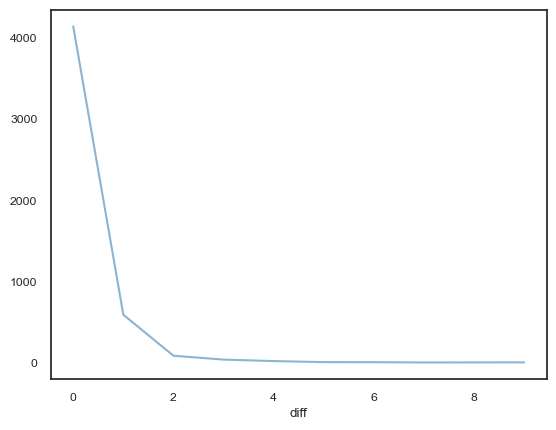

In [138]:
predictions["diff"].round().value_counts().sort_index().plot()

conclusion to improve the model, we always create more columns , add to the predictors and run it.

little variations occured as we can see.30 days in the 5246days'